In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

SEED = 42

# Dataset exploration

In [2]:
files = os.listdir('./data/datasets')
dataset = []

for file in files:
    ts = np.loadtxt(f'./data/datasets/{file}')
    start, a_start, a_end = [
        int(i) for i in file.split('.')[0].split('_')[-3:]
    ]
    dataset.append(
        (
            file,
            start,
            a_start,
            a_end,
            len(ts)
        )
    )

df = pd.DataFrame(
    data = dataset,
    columns=['name', 'test_start', 'anomaly_start', 'anomaly_end', 'length']
)
df['anomaly_length'] = df['anomaly_end'] - df['anomaly_start']
df.describe()

,test_start,anomaly_start,anomaly_end,length,anomaly_length
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,21209.796000,51732.584000,51929.036000,77415.064000,196.452000
std,32481.890956,96602.193981,96691.292249,120321.279605,238.199571
min,1000.000000,2764.000000,2995.000000,6684.000000,0.000000
25%,4000.000000,6521.750000,6579.750000,11308.000000,48.000000
50%,9406.000000,17390.000000,17520.000000,30066.000000,100.000000
75%,23300.000000,55600.000000,55875.000000,80000.750000,267.500000
max,250000.000000,884100.000000,884200.000000,900000.000000,1700.000000


In [3]:
df.columns.to_list()

['name',
 'test_start',
 'anomaly_start',
 'anomaly_end',
 'length',
 'anomaly_length']

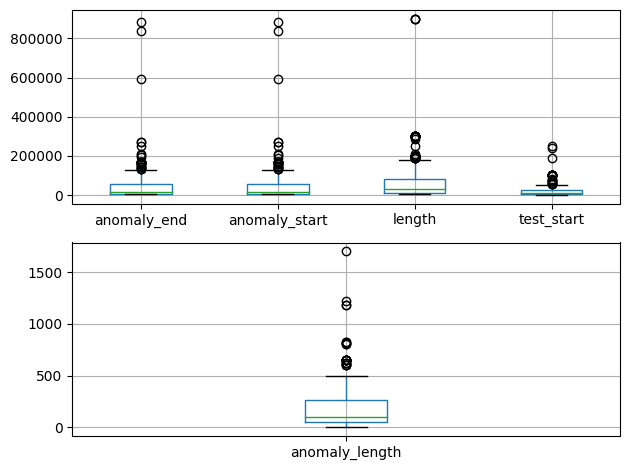

In [4]:
plt.subplot2grid((2,1), (0,0))
df[df.columns.difference(['anomaly_length'])].boxplot()
plt.subplot2grid((2,1), (1,0))
df[['anomaly_length']].boxplot()
plt.tight_layout()

In [5]:
df_smaller = df[df['length'] < 150000]
df_larger = df[df['length'] >= 150000]
print(len(df_smaller))
print(len(df_larger))

208
42


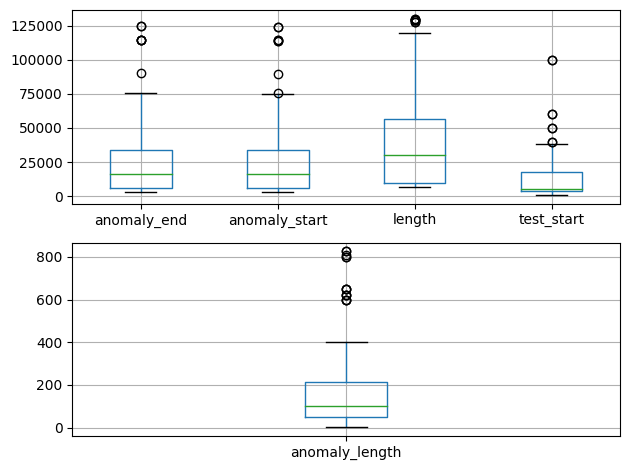

In [6]:
plt.subplot2grid((2,1), (0,0))
df_smaller[df_smaller.columns.difference(['anomaly_length'])].boxplot()
plt.subplot2grid((2,1), (1,0))
df_smaller[['anomaly_length']].boxplot()
plt.tight_layout()

In [7]:
df_smaller.sort_values('name')

,name,test_start,anomaly_start,anomaly_end,length,anomaly_length
0,001_UCR_Anomaly_DISTORTED1sddb40_35000_52000_5...,35000,52000,52620,79795,620
1,002_UCR_Anomaly_DISTORTED2sddb40_35000_56600_5...,35000,56600,56900,80001,300
2,003_UCR_Anomaly_DISTORTED3sddb40_35000_46600_4...,35000,46600,46900,80000,300
3,004_UCR_Anomaly_DISTORTEDBIDMC1_2500_5400_5600...,2500,5400,5600,11000,200
4,005_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature...,4000,5391,5392,8184,1
...,...,...,...,...,...,...
236,237_UCR_Anomaly_mit14157longtermecg_19313_8956...,19313,89560,90370,97000,810
237,238_UCR_Anomaly_mit14157longtermecg_21311_7260...,21311,72600,72780,99000,180
247,248_UCR_Anomaly_weallwalk_2000_4702_4707.txt,2000,4702,4707,8432,5
248,249_UCR_Anomaly_weallwalk_2753_8285_8315.txt,2753,8285,8315,10524,30


In [8]:
df_larger.sort_values('name')

,name,test_start,anomaly_start,anomaly_end,length,anomaly_length
14,015_UCR_Anomaly_DISTORTEDECG4_5000_16800_17100...,5000,16800,17100,200000,300
75,076_UCR_Anomaly_DISTORTEDresperation10_48000_1...,48000,130700,131880,195000,1180
76,077_UCR_Anomaly_DISTORTEDresperation11_58000_1...,58000,110800,110801,195000,1
77,078_UCR_Anomaly_DISTORTEDresperation1_100000_1...,100000,110260,110412,200000,152
78,079_UCR_Anomaly_DISTORTEDresperation2_30000_16...,30000,168250,168250,200051,0
79,080_UCR_Anomaly_DISTORTEDresperation2_30000_16...,30000,168250,168251,190050,1
80,081_UCR_Anomaly_DISTORTEDresperation3_45000_15...,45000,158250,158251,190100,1
81,082_UCR_Anomaly_DISTORTEDresperation4_70000_12...,70000,128430,128431,195250,1
82,083_UCR_Anomaly_DISTORTEDresperation9_38000_14...,38000,143411,143511,195000,100
107,108_UCR_Anomaly_NOISEresperation2_30000_168250...,30000,168250,168250,200051,0


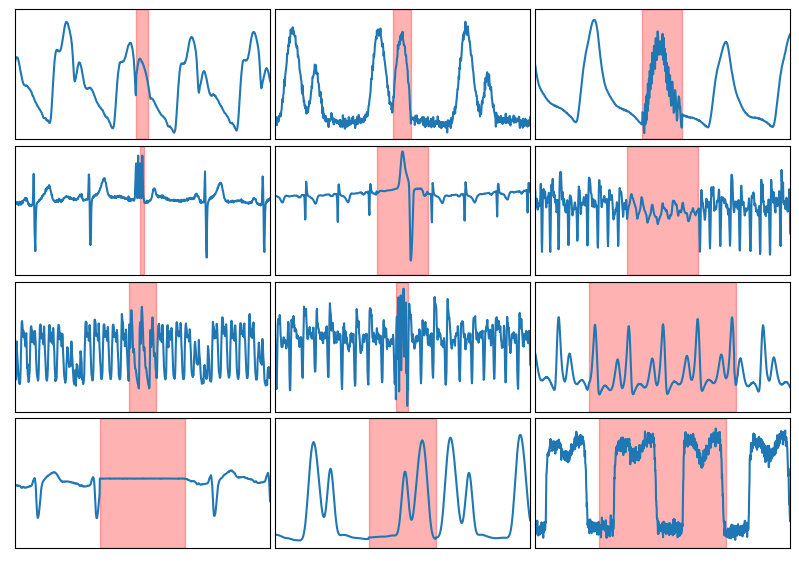

In [9]:
random_datasets = df_smaller.sample(12)

fig = plt.figure(figsize=(10, 7), dpi=100)
for i, row in enumerate(random_datasets.values):
    file = row[0]
    anomaly_start = row[2]
    anomaly_end = row[3]
    
    x = i//3
    y = i%3
    plt.subplot2grid((4,3), (x, y))
    ts = np.loadtxt(f'./data/datasets/{file}')
    plt.plot(ts)
    plt.xlim(anomaly_start - 300, anomaly_end + 300)
    plt.axvspan(anomaly_start, anomaly_end, color='red', alpha=0.3)
    plt.xticks([])
    plt.yticks([])

fig.subplots_adjust(hspace=0.05, wspace=0.02)

In [10]:
from sklearn.model_selection import train_test_split
print(f'Total number of datasets: {len(df)}')
print(f'Number of datasets after discarding the longer than 150000 values: {len(df_smaller)}')

train, test = train_test_split(df_smaller['name'].values, test_size=0.3, random_state=SEED)
print(f'Train datasets: {len(train)}')
print(f'Test datasets: {len(test)}')
np.savetxt('./data/train.txt', train, delimiter='\n', fmt='%s')
np.savetxt('./data/test.txt', test, delimiter='\n', fmt='%s')

Total number of datasets: 250
Number of datasets after discarding the longer than 150000 values: 208
Train datasets: 145
Test datasets: 63


In [11]:
train = np.loadtxt('./data/train.txt', dtype=str).tolist()
test = np.loadtxt('./data/test.txt', dtype=str).tolist()

In [12]:
from automltsad.utils import Autoperiod
import multiprocessing
import tqdm
import pandas as pd

files = train + test

def task(file):    
    start, a_start, a_end = [
        int(i) for i in file.split('.')[0].split('_')[-3:]
    ]
    ts = np.loadtxt(f'./data/datasets/{file}')
    traints = ts[:start]
    train_period = Autoperiod(traints).period
    period = Autoperiod(ts).period
    return file, train_period, period


periods = []

# with multiprocessing.Pool(processes=6) as pool:
#     results = list(tqdm.tqdm(pool.imap(task, files), total=len(files)))

# pd.DataFrame(
#     results, 
#     columns=['name', 'train_period', 'period']
# ).to_csv('./data/period.csv', index=False)

/root/.cache/pypoetry/virtualenvs/automltsad-DuHKdg10-py3.10/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


       train_period       period
count    205.000000   205.000000
mean     191.390244   296.482927
std      429.763870   899.328674
min        8.000000     6.000000
25%       35.000000    33.000000
50%      116.000000   115.000000
75%      209.000000   210.000000
max     4056.000000  7803.000000


<AxesSubplot: >

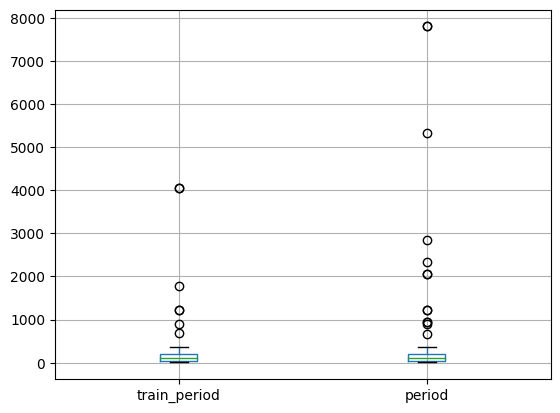

In [15]:
df_periods = pd.read_csv('./data/period.csv')
print(df_periods.describe())
df_periods.boxplot()